In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ppiech/openaigym/spinningup

In [2]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/bin-balance-bipedal/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/bin-balance-bipedal/



,Epoch,AverageEpRet,StdEpRet,EpLen,GoalPathLen,StabilityReward,StabilityActionError,StabilityGoalError,ForwardPredictionError,GoalsStepReward,...,ActionsEntropy,ActionsAdvantageMean,ActionsKL,ActionsStopIter,LossActionInverse,LossGoalInverse,Unit,Condition1,Condition2,Performance
0,0,-71.540330,33.891613,630.40000,1.016648,0.555511,0.607699,0.289676,0.621368,0.555411,...,3.666119,1.035465,0.025046,4.0,0.408216,0.264089,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-71.540330
1,1,-60.393330,32.276062,765.00000,1.019192,0.591915,0.485760,0.306512,0.466438,0.591850,...,3.672947,0.580599,0.019811,6.0,0.332932,0.257174,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-60.393330
2,2,-61.309670,25.650702,768.50000,1.020465,0.615270,0.363580,0.302414,0.389587,0.615335,...,3.687752,0.597944,0.019025,9.0,0.298775,0.255576,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-61.309670
3,3,-101.901825,22.271868,188.22223,1.018589,0.626637,0.451582,0.301461,0.388171,0.626436,...,3.671642,0.157337,0.019559,8.0,0.292964,0.253407,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-101.901825
4,4,-98.289060,29.652084,247.56250,1.020757,0.629594,0.200173,0.312211,0.343106,0.629640,...,3.716282,0.480461,0.016945,10.0,0.291578,0.253187,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-98.289060
5,5,-73.594330,38.551060,540.66670,1.017670,0.626508,0.218436,0.321984,0.280562,0.626247,...,3.699989,0.559741,0.016980,12.0,0.284306,0.252270,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-73.594330
6,6,-101.464714,27.329580,212.93333,1.017688,0.630720,0.204529,0.312840,0.296673,0.630963,...,3.684279,0.488439,0.016678,34.0,0.288793,0.251456,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-101.464714
7,7,-110.084274,17.817406,124.46154,1.019375,0.634416,0.272778,0.308480,0.325546,0.633921,...,3.700223,-0.081749,0.021756,7.0,0.274785,0.251450,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-110.084274
8,8,-107.468730,23.031412,159.91304,1.017453,0.642768,0.219564,0.307359,0.274017,0.642785,...,3.688486,0.244278,0.015274,47.0,0.285831,0.250857,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-107.468730
9,9,-112.134030,13.933367,114.73529,1.027099,0.641153,0.192007,0.306504,0.284931,0.640980,...,3.716477,0.298846,0.020849,7.0,0.283018,0.250693,0,bin_step_bipedalwalker-v2,bin_step_bipedalwalker-v2-0,-112.134030


In [3]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
#           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch
0,bin_step_bipedalwalker-v2,4000
10,bin_no_step_bipedalwalker-v2,4000


/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


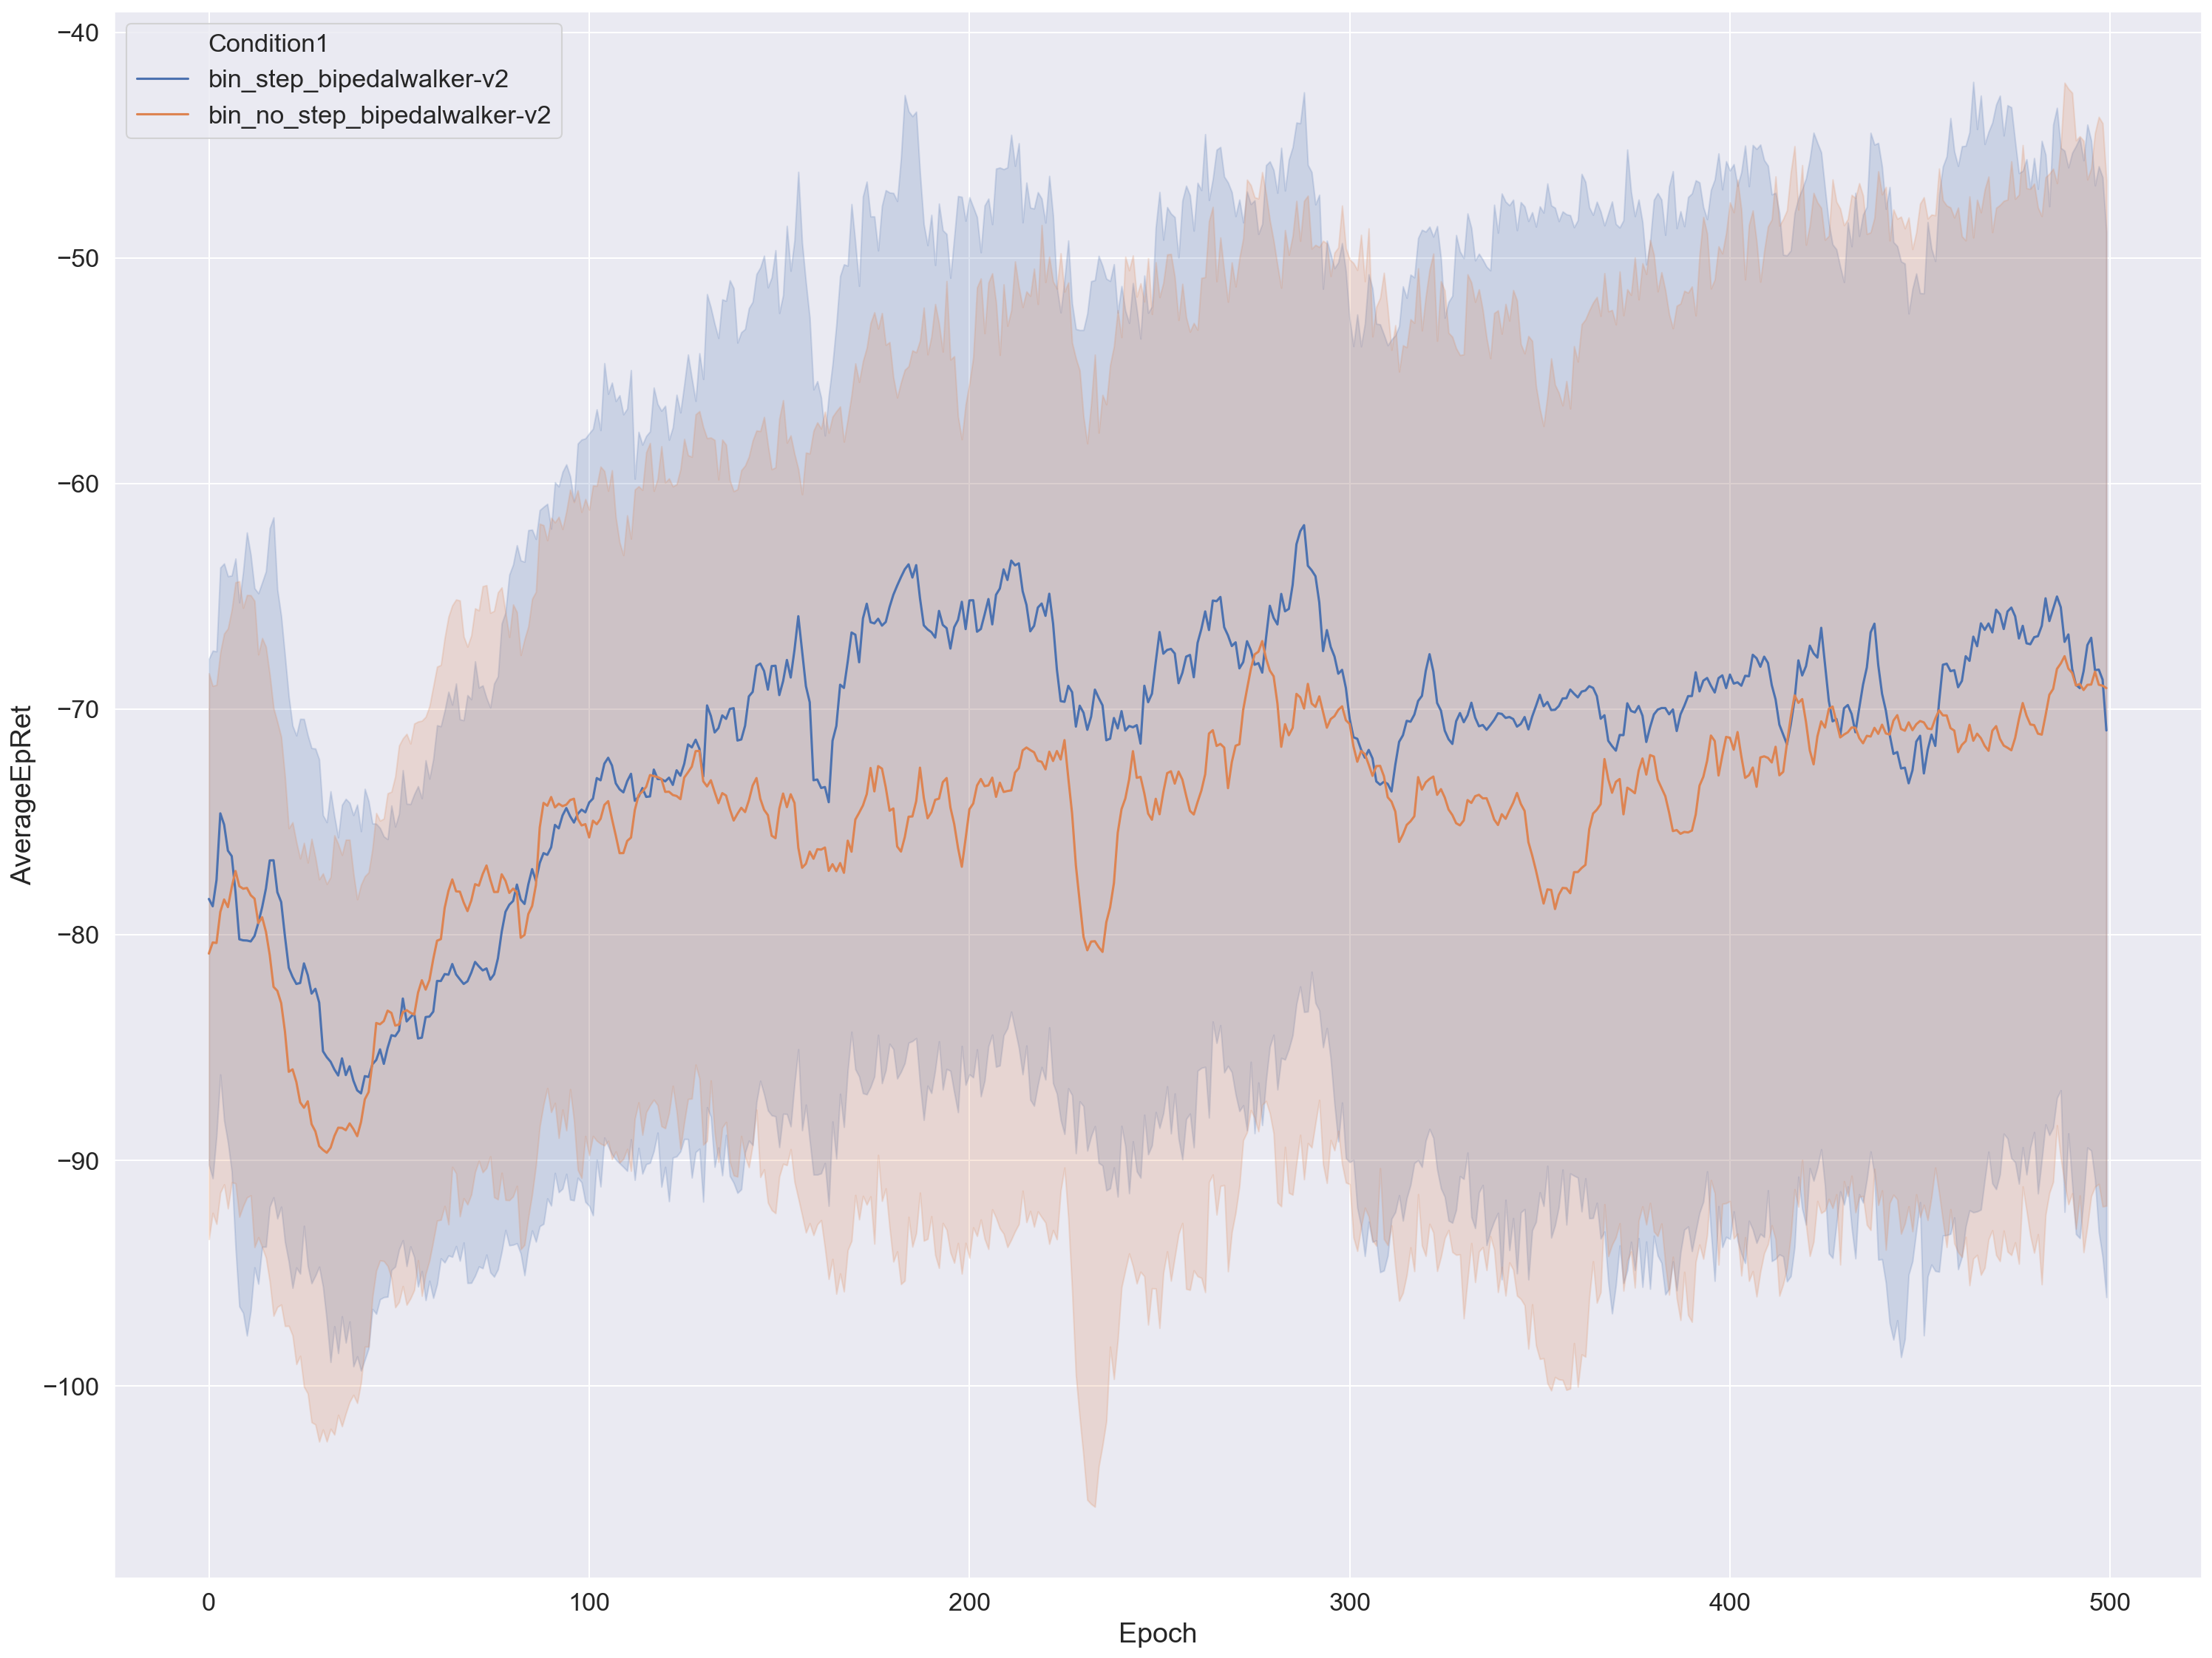

In [4]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5)
plt.show()

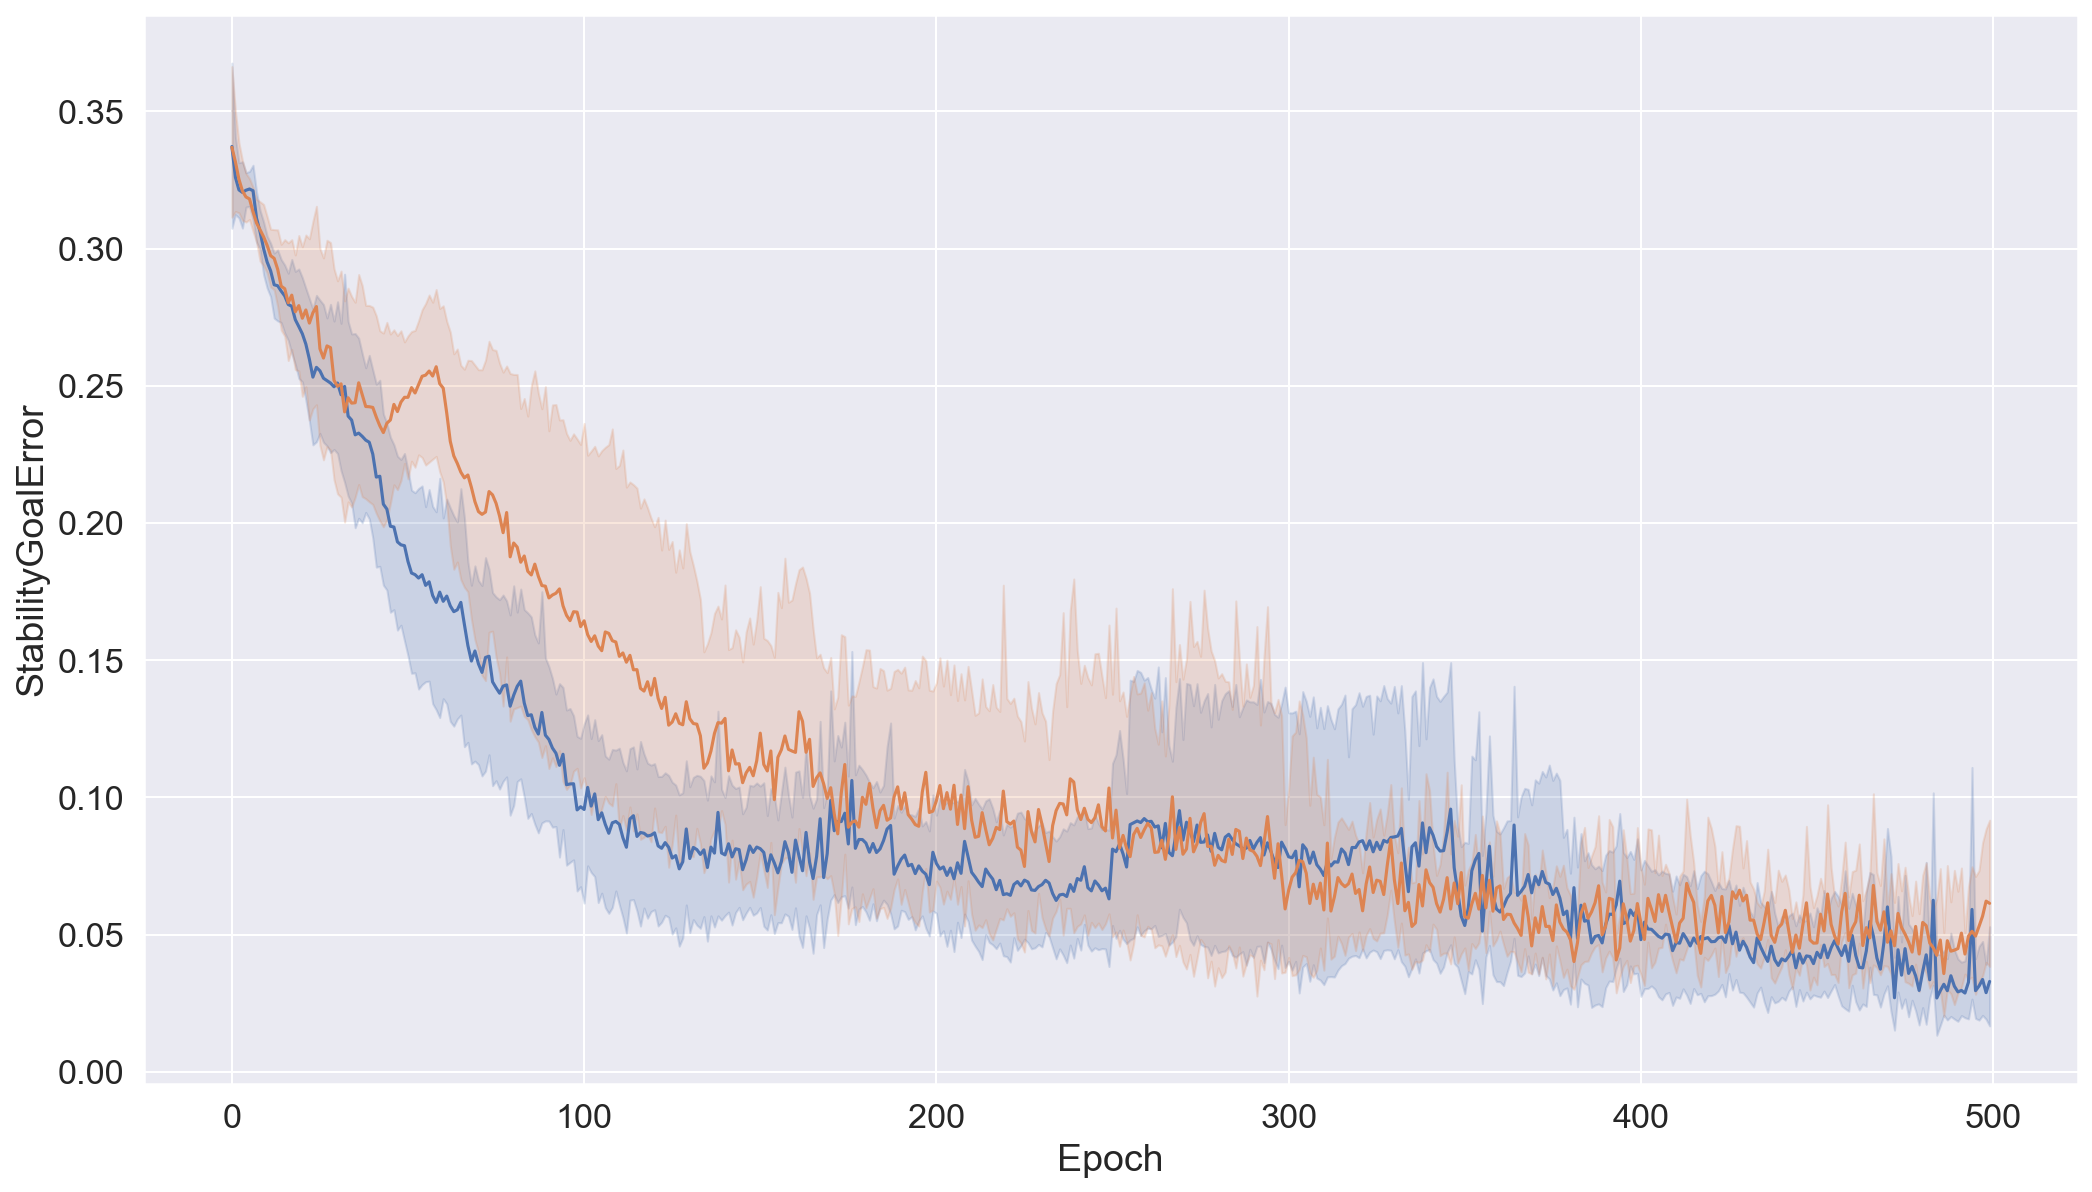

In [5]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

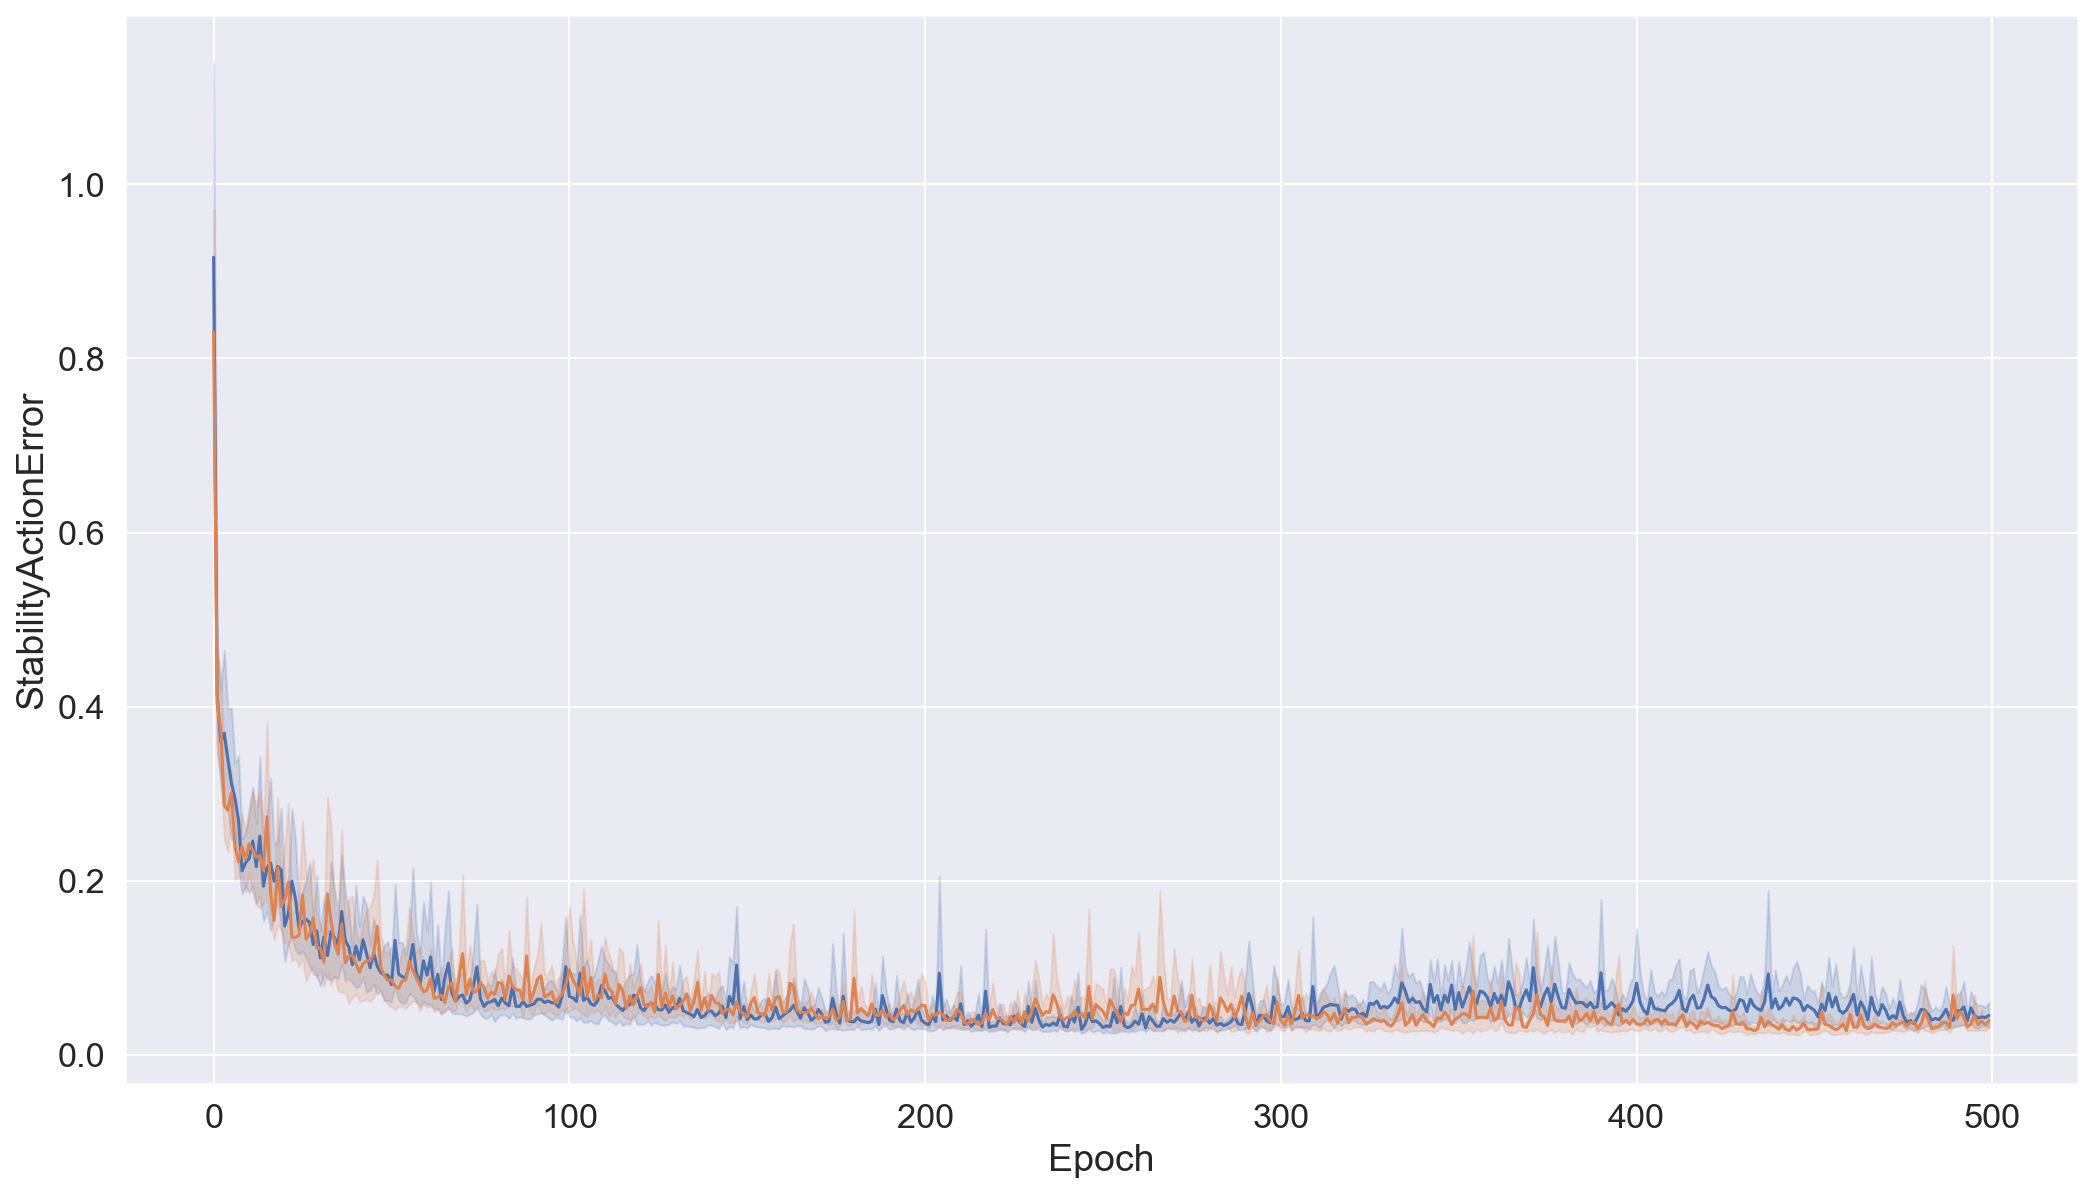

In [6]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

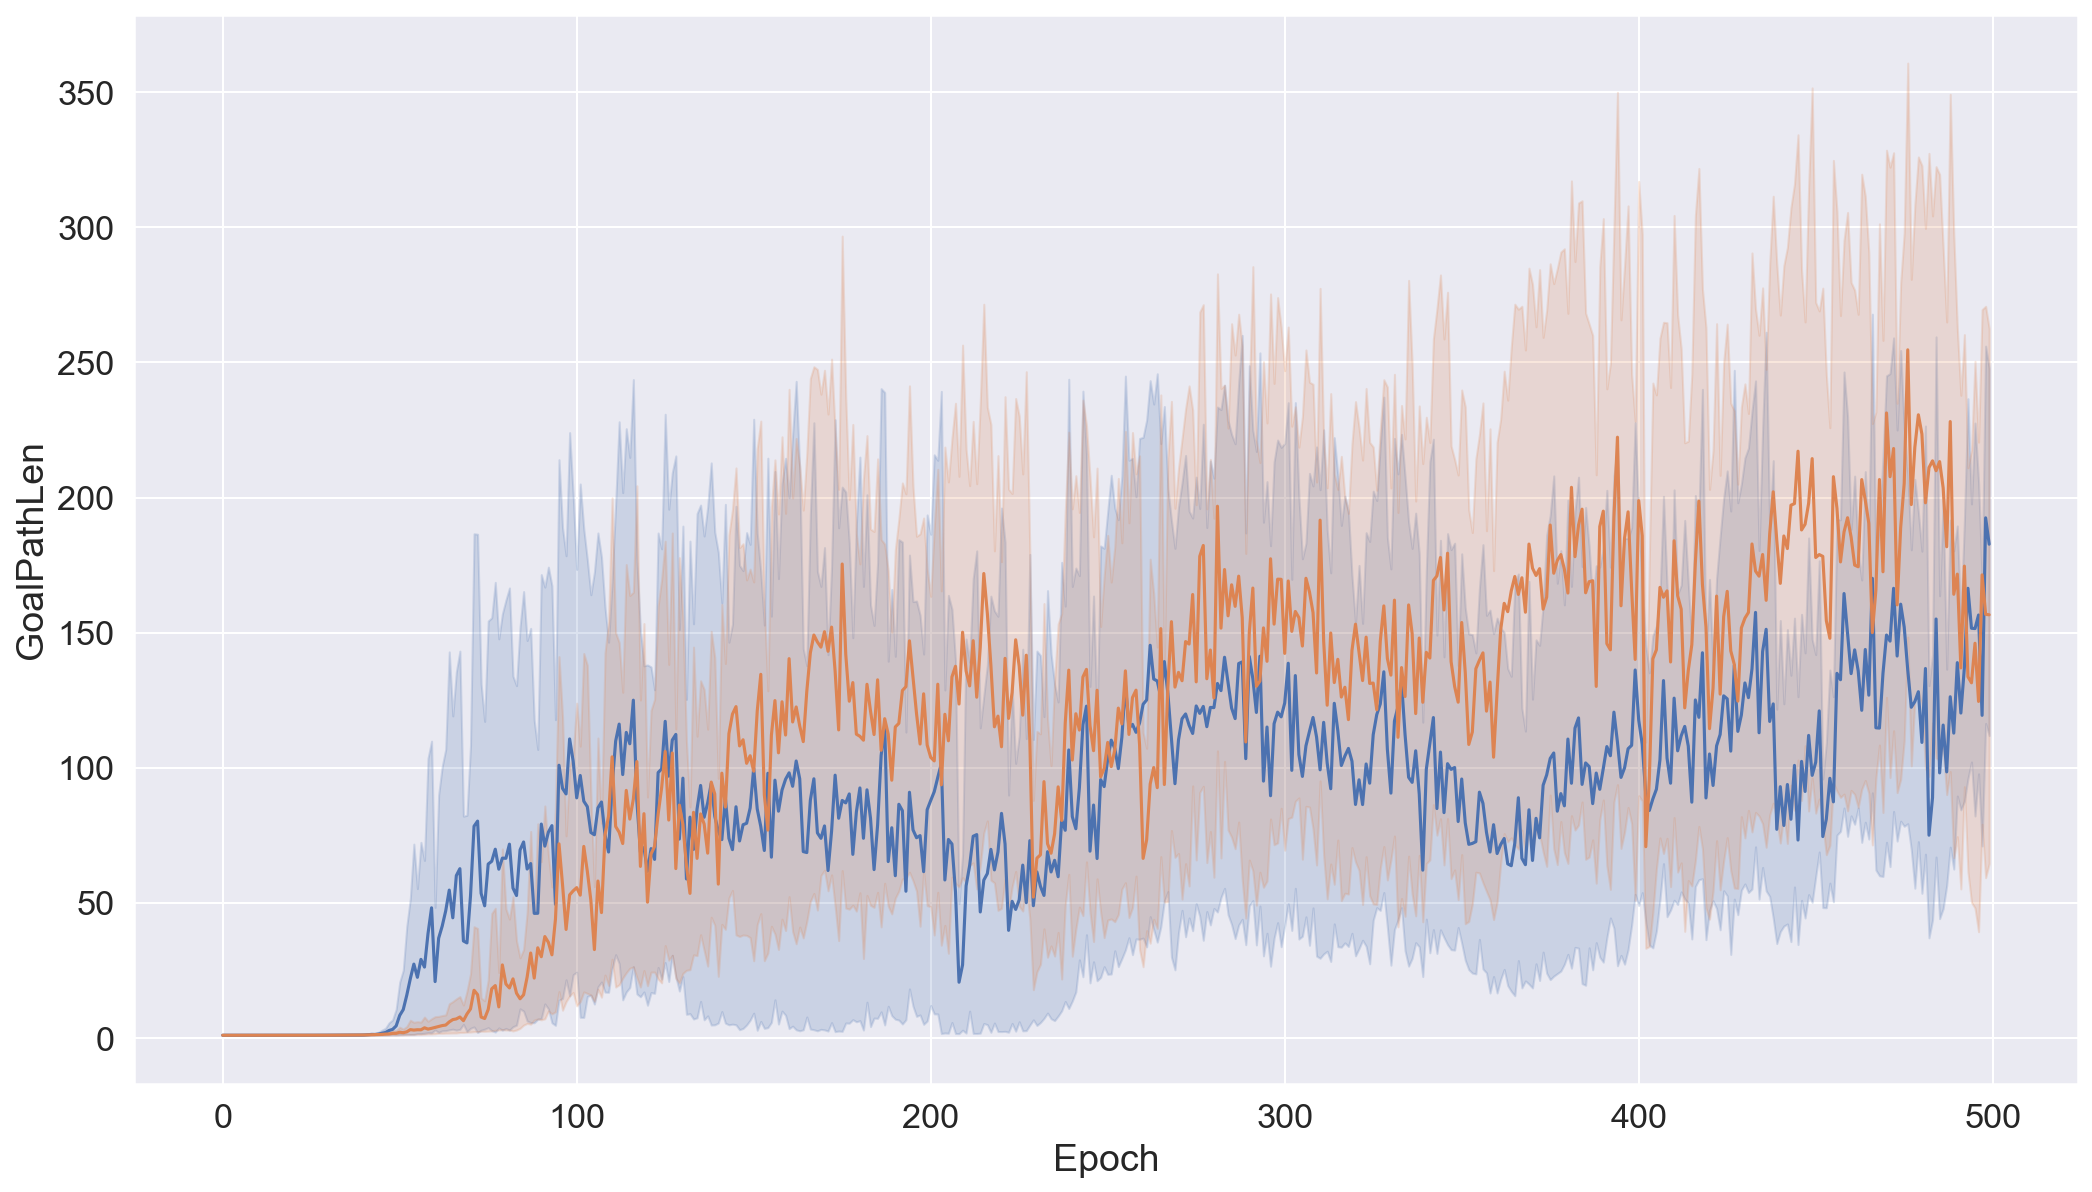

In [7]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()

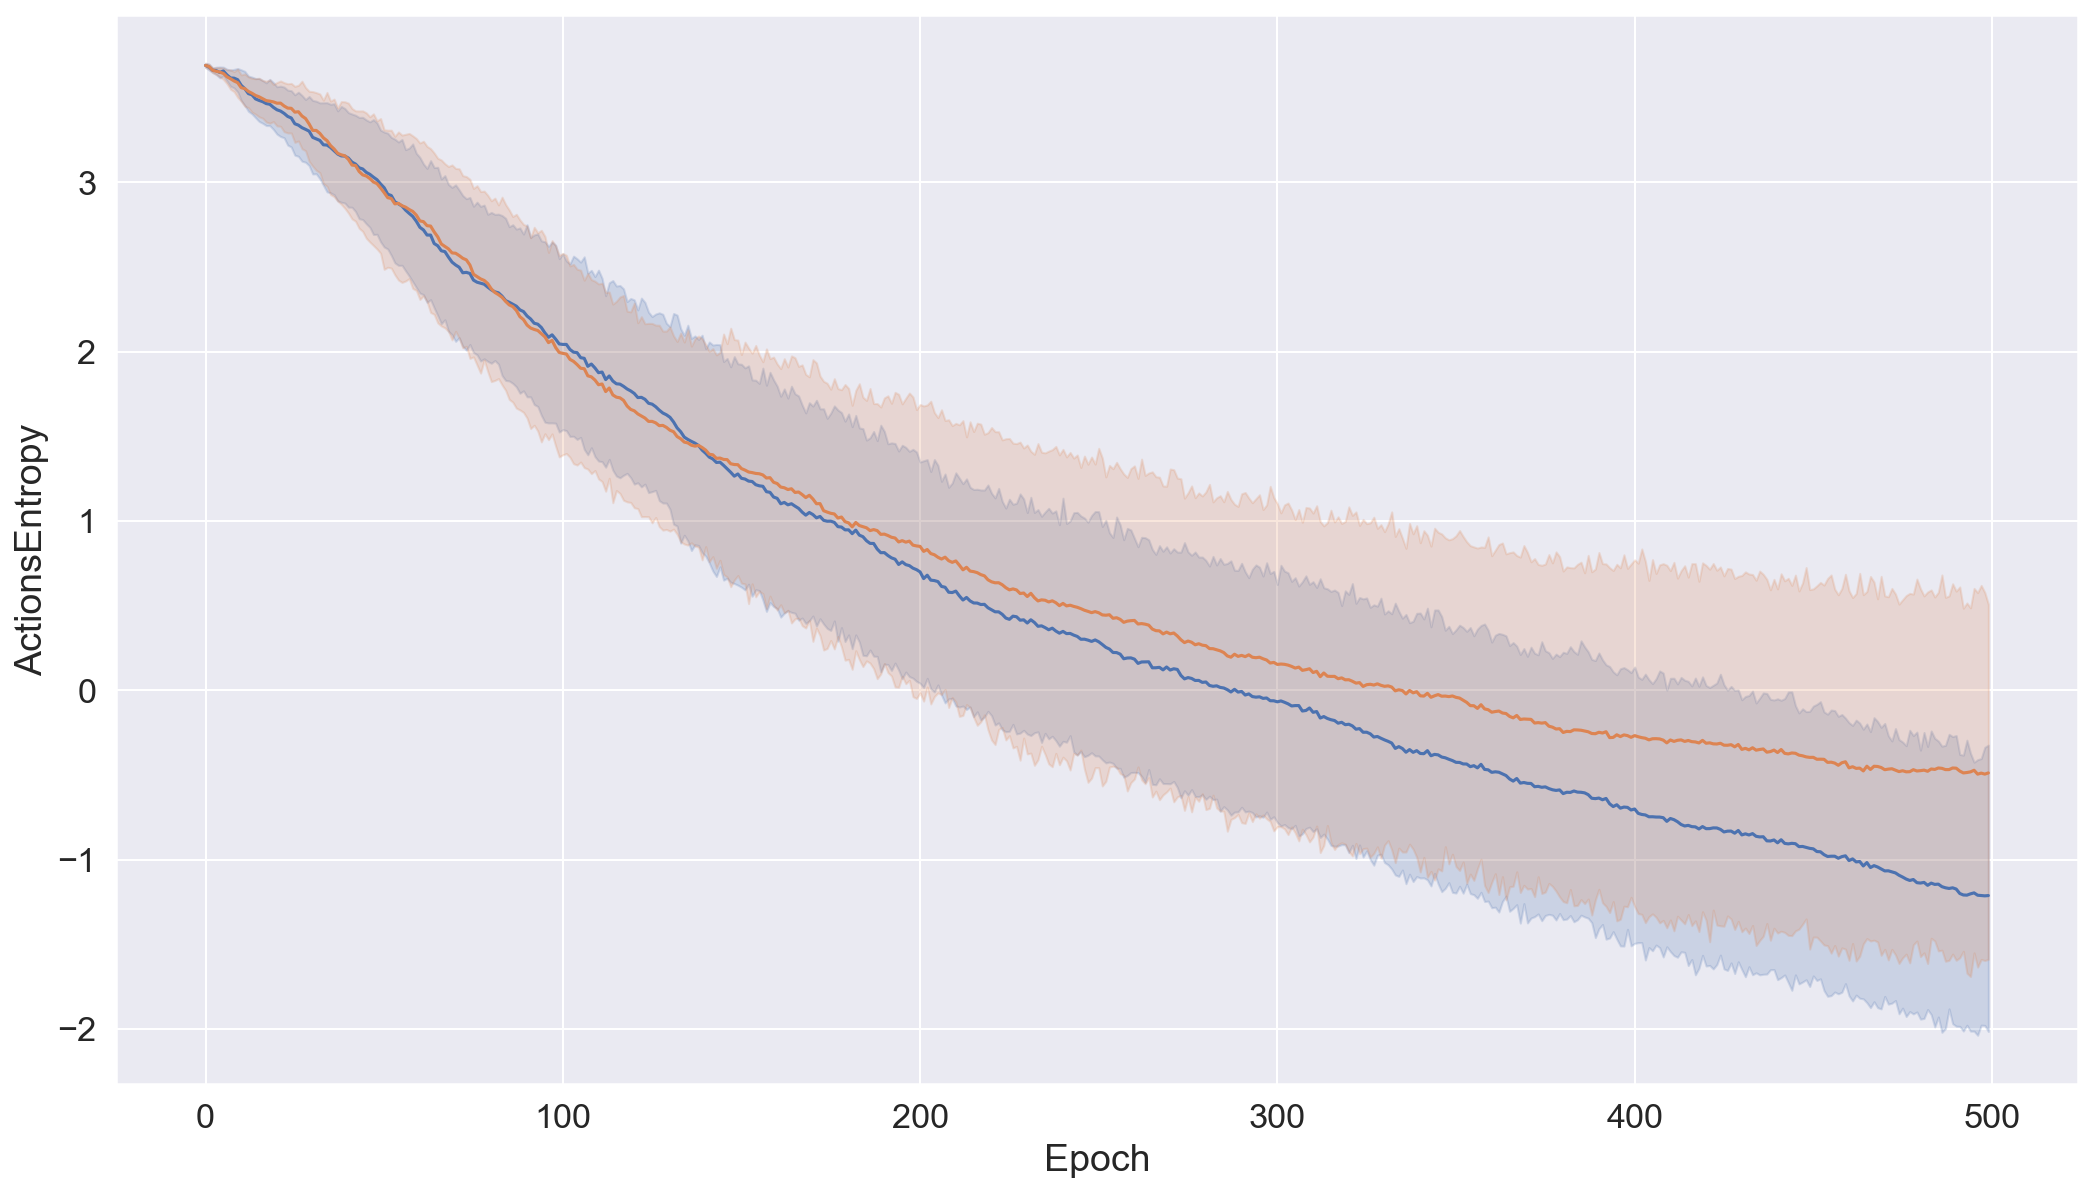

In [8]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

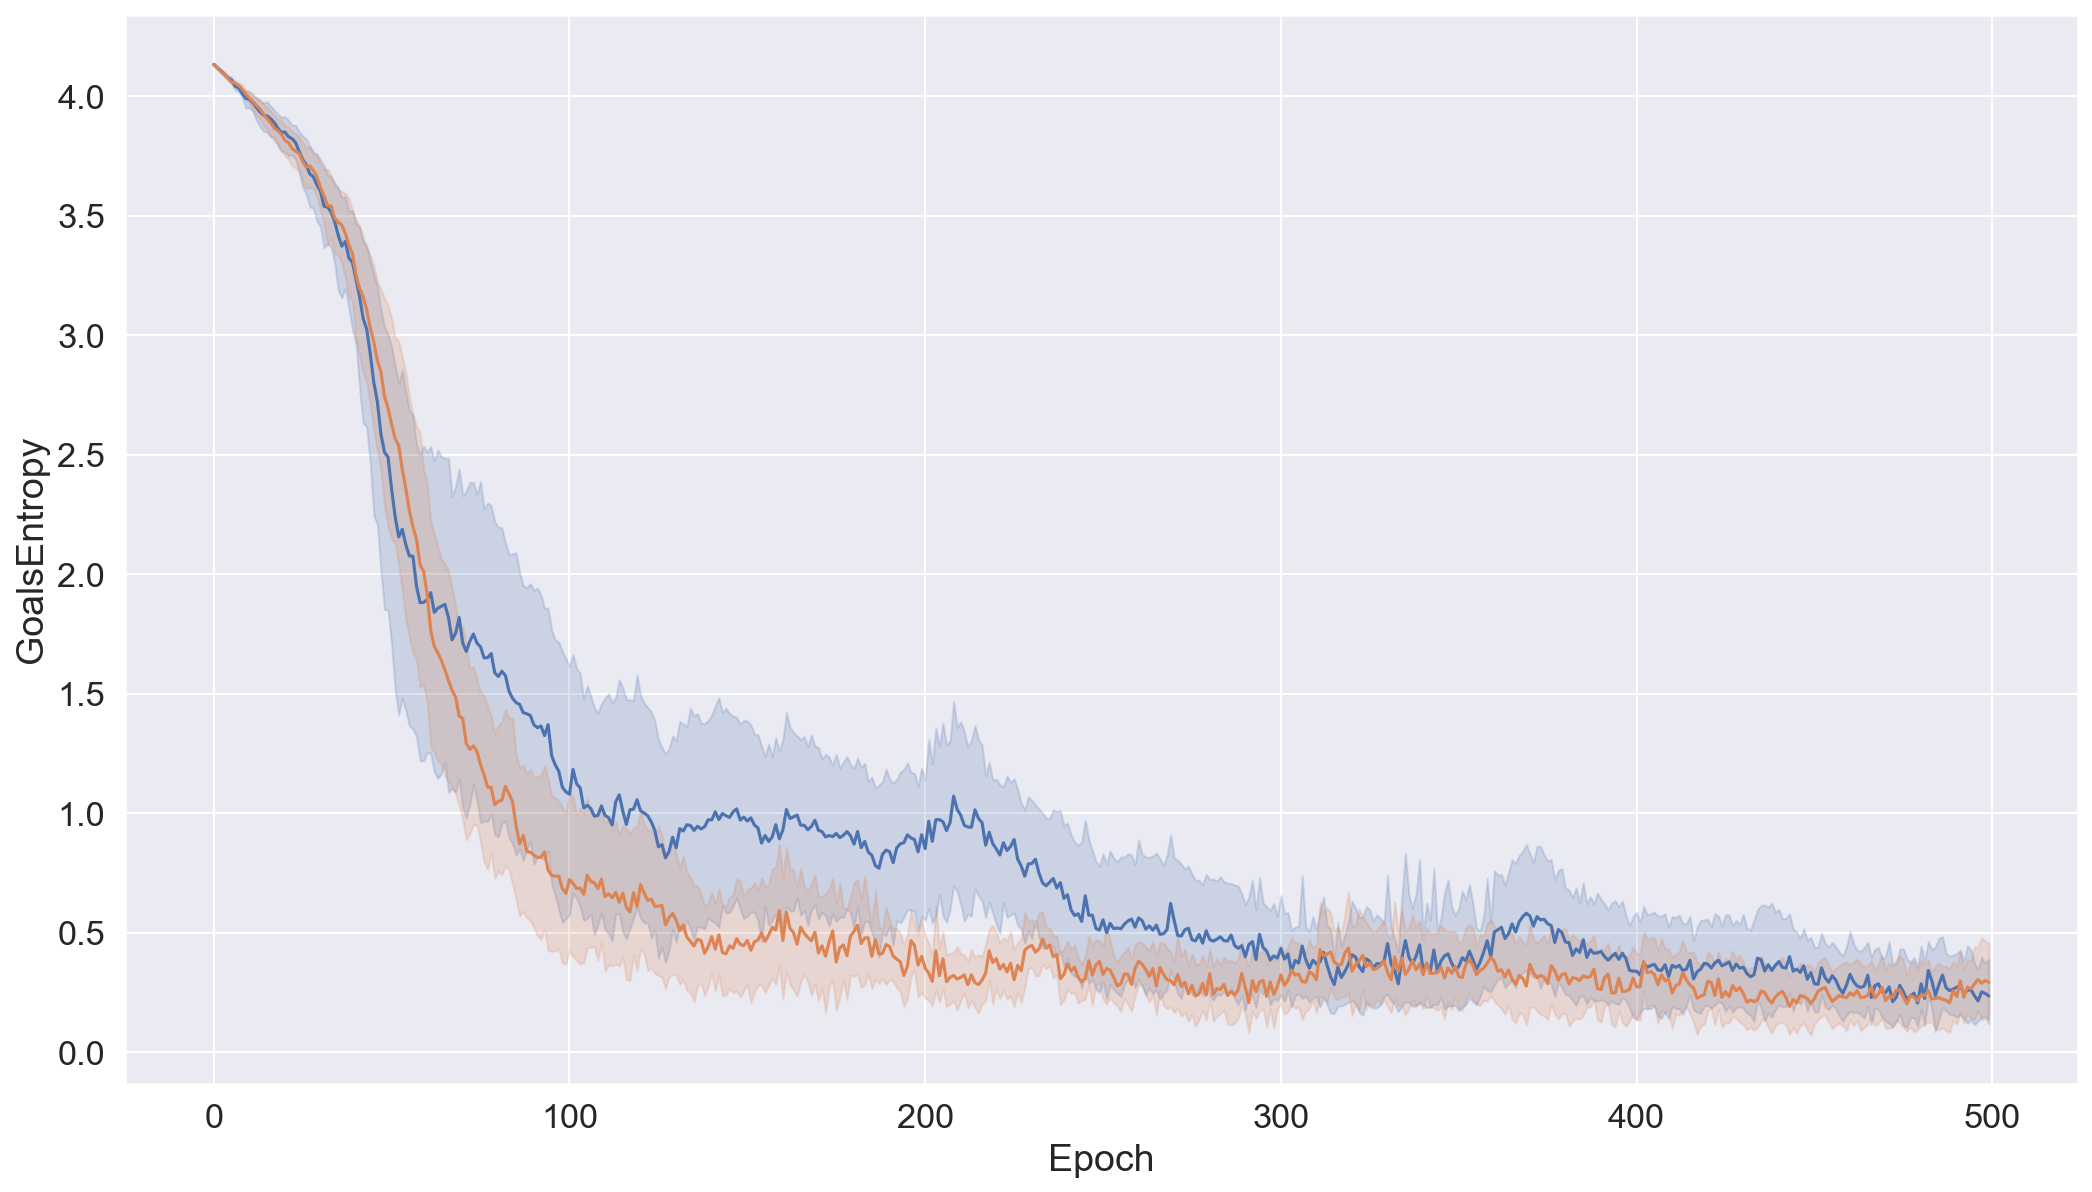

In [9]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()

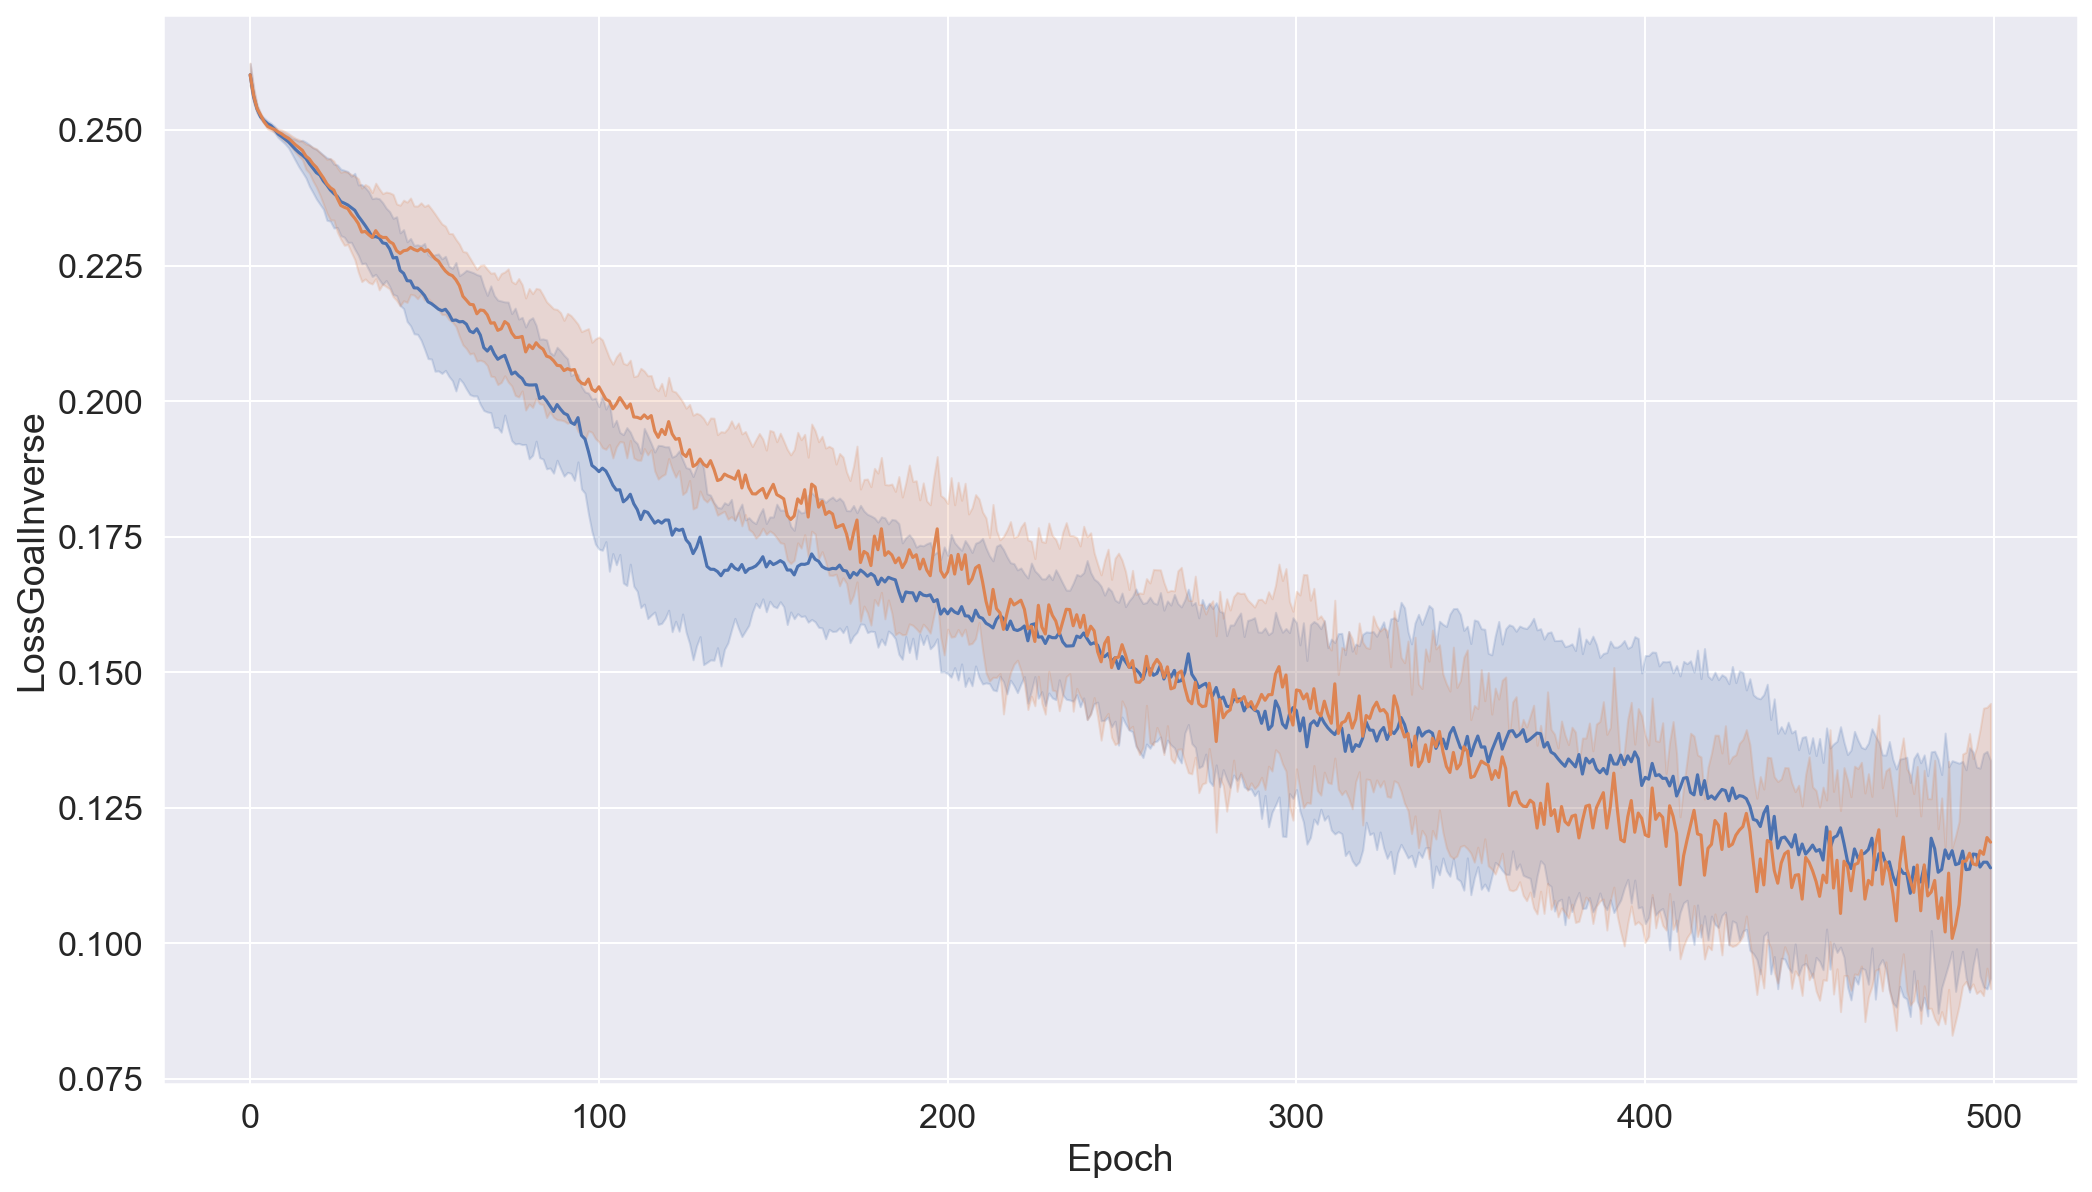

In [10]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='LossGoalInverse', smooth=1, show_legend=False)
plt.show()